# Importing packages and data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

df = pd.read_csv("fraud_prediction.csv")
df = df.drop(['Unnamed: 0'], axis = 1)

# Setting up and running model

In [2]:
features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

X_test,X_train, y_test, y_train = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [3]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

In [4]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [5]:
print( "{0:.4}".format(dt.score(X_test,y_test)))

0.9961


# Hyperparameter tuning

In [6]:
grid_params = {'max_depth': [1,2,3,4,5,6], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]}

In [7]:
grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [8]:
grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [9]:
print("The most optimal parameters are:",grid_object.best_params_)

The most optimal parameters are: {'max_depth': 1, 'min_samples_leaf': 0.02}


# Rerunning Model

In [10]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50, max_depth = 5)

In [11]:
dt.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [12]:
feature_names = df.drop('isFraud', axis = 1)

In [13]:
data = tree.export_graphviz(dt, out_file = None, feature_names = feature_names.columns.values, proportion = True)

In [14]:
graph = pydotplus.graph_from_dot_data(data)

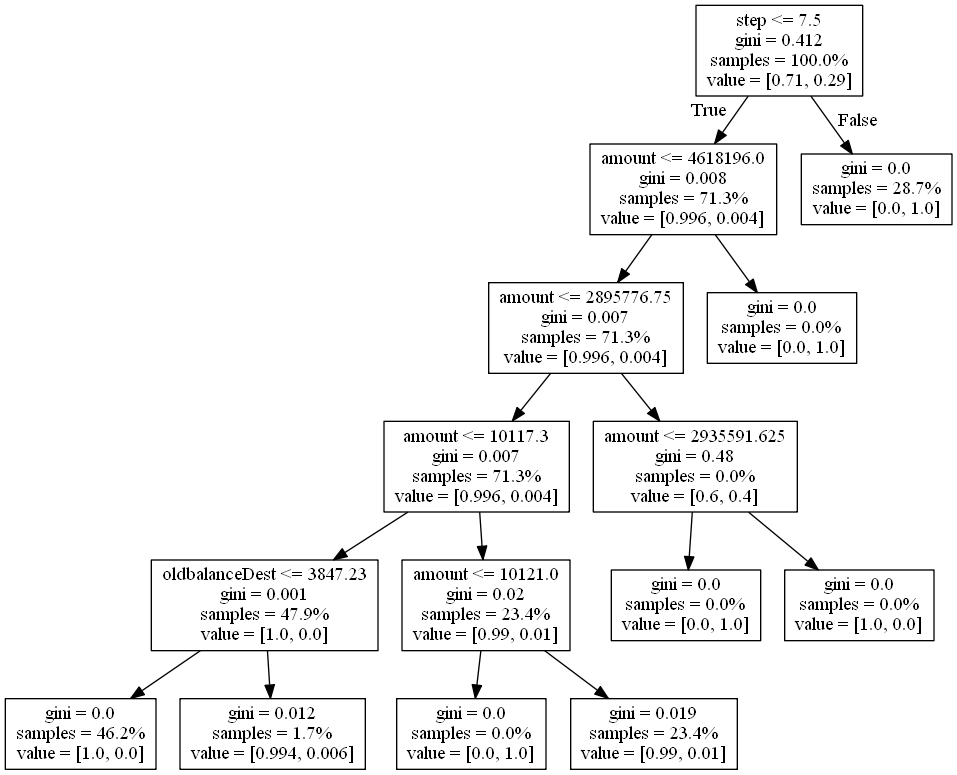

In [15]:
Image(graph.create_png())

In [22]:
df.shape[0]

28345